In [33]:
import matplotlib.pyplot as plt



print("Begin init")
%run -i notebook/init_notebook.ipynb


import pandas as pd
import numpy as np

from structlog import get_logger
from tqdm import tqdm


from src.model.StockModel import StockModel
from src.repository.FileOhlcRepository import FileOhlcRepository
from src.repository.SymbolRepository import SymbolRepository
from src.scrapper.YahooScrapper import YahooScrapper
from datetime import datetime, timedelta
print("Loading modules complete", datetime.now())

Begin init
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading modules complete 2021-05-07 13:01:47.714258


In [34]:
def _get_1min_data(symbol):
    from structlog import get_logger
    logger = get_logger()
    stop_date = datetime.utcnow()
    start_date = stop_date - timedelta(days=365)
    ohlc_repository = FileOhlcRepository("./_data/", logger)
    df_original = ohlc_repository.read_data("yahoo", symbol, start_date, stop_date)

    df_original = df_original[df_original['volume'] > 0]
    return df_original


stock = StockModel.parse("NASDAQ:MSFT")
min1_df = _get_1min_data(stock)
min1_df.describe()

,low,close,open,high,volume
count,75406.000000,75406.000000,75406.000000,75406.000000,7.540600e+04
mean,222.795352,222.898161,222.898428,222.999701,3.104025e+09
std,15.830188,15.823068,15.822772,15.815738,8.562049e+10
min,196.380000,196.470000,196.455000,196.670000,1.420000e+02
25%,210.921250,211.045250,211.050000,211.150000,3.107000e+04
50%,216.920000,217.029500,217.030000,217.125000,4.727600e+04
75%,233.731500,233.850000,233.860000,233.960000,7.585350e+04
max,262.950000,263.180000,263.190000,263.190000,5.425764e+12


In [47]:
import src.calulation.utils as ta_utils

from src.calulation.indicator_builder import build_indicatrors
from dataset_generator import get_inidicators

indicators = get_inidicators()

ppo(row:'close', fast:5, slow:2048, k:5)


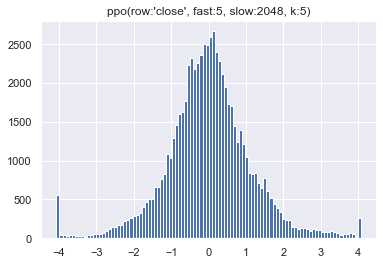

Min:-4.06771
Max:4.06771

mean 0.8493732787076969
75% 1.16201
80% 1.3345000000000002
90% 4.06771
99% 4.06771
****************************************************************************************************
ppo_smooth(row:'close', fast:5, slow:2048, k:5)


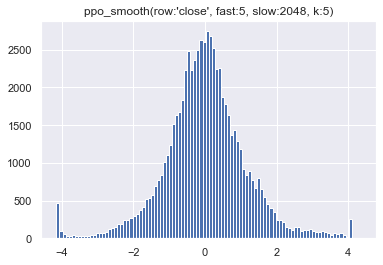

Min:-4.1491
Max:4.3508

mean 0.8499819380162268
75% 1.16109
80% 1.3363920000000007
90% 4.0658772
99% 4.0658772
****************************************************************************************************
ppo_hist(row:'close', fast:5, slow:2048, k:5)


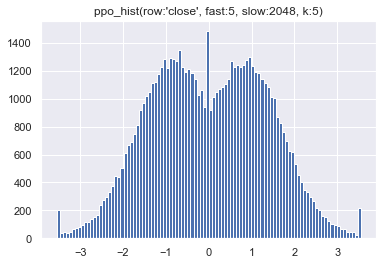

Min:-3.55137
Max:3.55137

mean 1.1189647274322052
75% 1.57445
80% 1.7194580000000002
90% 3.2445220000000012
99% 3.2445220000000012
****************************************************************************************************


In [83]:
df = min1_df.copy()
basic_price = df.iloc[0].low
basic_volume = df.volume.min()
ta_utils.normilize_data_(df, basic_price, basic_volume)

min1_df_with_indicators = build_indicatrors(df, indicators)
min1_df_with_indicators = min1_df_with_indicators.iloc[7000:-1] # drop warmup

min1_df_with_indicators = min1_df_with_indicators.round(5)

# print(min1_df_with_indicators.iloc[-1].to_dict())
raw_columns = {'date', 'low', 'close', 'high', 'open', 'volume'}
for col in min1_df_with_indicators.columns:
    if col in raw_columns:
        continue

    print(f"{col}")
    plt.title(col)
    min1_df_with_indicators[col].hist(bins=100)
    plt.show()
    print(f"Min:{min1_df_with_indicators[col].min()}")
    print(f"Max:{min1_df_with_indicators[col].max()}")
    abs = np.abs(min1_df_with_indicators[col])
    print()
    print("mean", np.mean(abs))
    print("75%", np.percentile(abs, 75))
    print("80%", np.percentile(abs, 80))
    print("90%", np.percentile(abs, 99))
    print("99%", np.percentile(abs, 99))
    print("*"*100)

In [ ]:
min1_df_with_indicators['profit'], min1_df_with_indicators['loss'] = ta_utils.get_long_profit_and_loss(min1_df_with_indicators, l=15)

In [ ]:
min1_df_with_indicators['profit'].hist(bins=100)
plt.show()

min1_df_with_indicators['loss'].hist(bins=100)
plt.show()

In [ ]:
positive = min1_df_with_indicators[min1_df_with_indicators['profit']>0.25/100]
print(100*len(positive)/len(min1_df_with_indicators))

positive = min1_df_with_indicators[min1_df_with_indicators['loss']>0.5/100]
print(100*len(positive)/len(min1_df_with_indicators))

In [84]:
from dataset_generator import generate_sliced_data_set_v1

data = list(tqdm(generate_sliced_data_set_v1(stock)))
print("DONE ", len(data))

0it [00:00, ?it/s]

Load 75406 items


197934it [02:14, 1472.65it/s]


DONE  197934


In [85]:
data[100]

{'date': Timestamp('2020-08-06 16:35:00'),
 'low': 1.0789327122677332,
 'close': 1.079312439876462,
 'open': 1.0791352336590552,
 'high': 1.0795402764416993,
 'volume': 4.132486765936335,
 'profit': 0.0017591180954614751,
 'loss': 0.00016418435557652168,
 'vortex_positive(n:14)': 0.3186528497409127,
 'vortex_negative(n:14)': 0.6468048359239797,
 'vortex_positive(n:24)': 0.5057208237986015,
 'vortex_negative(n:24)': 0.4637681159420072,
 'vortex_positive(n:32)': 0.5348967057509686,
 'vortex_negative(n:32)': 0.45951982132886315,
 'rsi(n:14, smooth:8)': 0.4955648540394396,
 'rsi_smooth(n:14, smooth:8)': 0.4500526611532435,
 'rsi_hist(n:14, smooth:8)': 2.4728046846965546,
 'rsi(n:24, smooth:8)': 0.497409766500917,
 'rsi_smooth(n:24, smooth:8)': 0.4740086818105631,
 'rsi_hist(n:24, smooth:8)': 1.739894954555158,
 'rsi(n:32, smooth:5)': 0.49980977318645065,
 'rsi_smooth(n:32, smooth:5)': 0.49597198322727243,
 'rsi_hist(n:32, smooth:5)': 0.46861354777724457,
 "BB_STDDEV(col:'close', n:14)": 0.

In [87]:
import torch

torch.save(data, "./_temp/MSFT.zip")
print("DONE")

DONE


In [89]:
loaded_data = torch.load("./_temp/MSFT.zip")
print(f"Loaded {len(loaded_data)}")

Loaded 197934


In [103]:
keys = set(loaded_data[0].keys())
raw = {"close", "open", "date", "high", "loss", "low", "volume", "profit"}
x_keys = keys - raw

from sklearn.preprocessing import StandardScaler
for k in x_keys:


all_x, all_y = [], []
for i in tqdm(loaded_data):
    x = [i.get(key) for key in keys]
    y = i['profit'] > 0.5
    all_x.append(x)
    all_y.append(y)
print("DONE")


100%|██████████| 197934/197934 [00:04<00:00, 46132.18it/s]

DONE
